In [1]:
#Kmeans -> unsupervised
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns


In [19]:


def kmeans(X, K, max_iters=100):
    # Step 1: Initialize centroids with the first K samples
    centroids = X[:K]
    
    # Step 1: Assign the remaining n-K samples to the nearest centroid and update centroids
    for i in range(K, len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        centroids[nearest_centroid] = (centroids[nearest_centroid] + X[i]) / 2
    
    labels = np.zeros(X.shape[0])
    
    # Step 2: Assign each sample to the nearest centroid without updating centroids
    for _ in range(max_iters):
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            nearest_centroid = np.argmin(distances)
            labels[i] = nearest_centroid
    
    return labels, centroids


In [20]:
iris = load_iris()
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


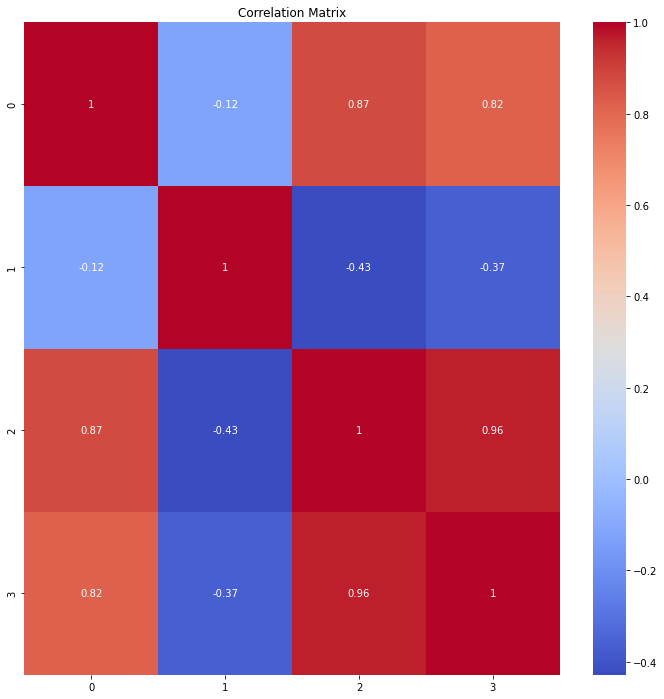

In [22]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
K = 3
labels,centroids = kmeans(X_scaled,K)
print("labels : ",labels)
print("centroids",centroids)


labels :  [0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]
centroids [[ 0.684312    0.39488866  0.9094604   1.36632955]
 [ 0.2127703  -0.5201684   0.75084178  0.83154966]
 [-1.18387052  0.57041411 -1.3304718  -1.24593938]]


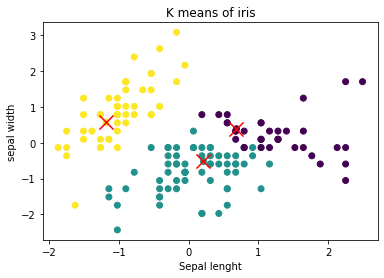

In [26]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = labels)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',color = 'red',s = 200)
plt.xlabel('Sepal lenght')
plt.ylabel('sepal width')
plt.title('K means of iris')
plt.show()

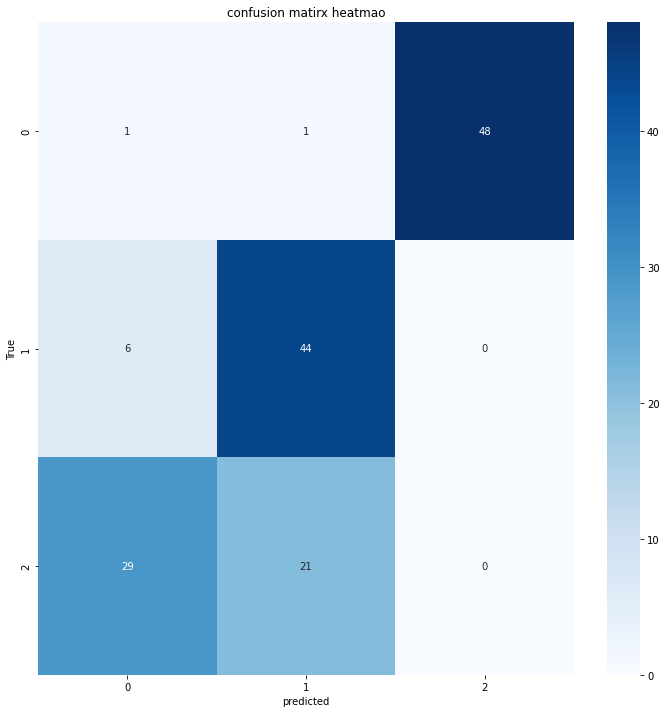

In [27]:
conf_matrix = confusion_matrix(y,labels)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,annot = True,cmap = "Blues")
plt.xlabel("predicted")
plt.ylabel('True')
plt.title("confusion matirx heatmao")
plt.show()